In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [8]:
# load dataframe from csv Data/rodada_1.csv
df = pd.read_csv('Data/rodada_1.csv')
# print all header columns
print(df.head())
print(df.columns)


    Player         Team     Pos  GP   W% CTR%   K   D   A  KDA  ... CS%P15  \
0    Aegis   RED Canids  Jungle   2  50%  50%   7  10  16  2.3  ...  19.5%   
1  Aithusa         INTZ  Middle   2  50%  50%  14   8  19  4.1  ...  25.0%   
2      Ayu        FURIA     ADC   2  50%  50%  11   3   9  6.7  ...  30.5%   
3   Brance   RED Canids     ADC   2  50%   0%  18   6  14  5.3  ...  28.1%   
4   CarioK  paiN Gaming  Jungle   2  50%   0%   8   5  15  4.6  ...  16.9%   

   DPM   DMG%  D%P15  EGPM  GOLD%  STL   WPM  CWPM  WCPM  
0  308  13.0%  14.1%   218  17.7%    0  0.40  0.19  0.37  
1  814  29.0%  28.6%   267  24.3%    0  0.55  0.20  0.40  
2  515  21.4%  24.7%   286  23.7%    0  0.45  0.19  0.17  
3  903  37.0%  38.0%   328  27.2%    0  0.71  0.22  0.47  
4  380  15.1%  15.4%   240  19.3%    0  0.37  0.28  0.42  

[5 rows x 28 columns]
Index(['Player', 'Team', 'Pos', 'GP', 'W%', 'CTR%', 'K', 'D', 'A', 'KDA', 'KP',
       'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 'CSPM', 'CS%P15', '

In [9]:
def preprocess(data, i):
    df = data.copy()
    # Mapping position values to integers
    df['Pos'] = df['Pos'].replace({'Top': 0, 'Jungle': 1, 'Middle': 2, 'ADC': 3, 'Support': 4})
    # Mapping winrate values to integers
    df['W%'] = df['W%'].replace({'0%': 0, '50%': 1, '100%': 2})
    # Normalizing KS%, DTH%, FB%, CS%P15, DMG%, D%P15, and GOLD% values to floats
    columns_to_normalize = ['KS%', 'CTR%', 'KP','DTH%', 'FB%', 'CS%P15', 'DMG%', 'D%P15', 'GOLD%']
    for column in columns_to_normalize:
        print(column)
        df[column] = df[column].astype('str').str.rstrip('%').astype('float')/100
    # Create a new column with the number of the round
    df['ROUD'] = i
    
    # Dropping column GP
    df = df.drop(columns=['GP'])

    return df

def plot_correlation_matrix(data, title):
    #heatmap
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

In [11]:
data = preprocess(df, 1)

# separate player names and team from data and remove them from the dataframe
players = data['Player']
teams = data['Team']
#data = data.drop(columns=['Player', 'Team'])

# separate the dataframe into 5 different dataframes, one for each position
top = data[data['Pos'] == 0]
jng = data[data['Pos'] == 1]
mid = data[data['Pos'] == 2]
adc = data[data['Pos'] == 3]
sup = data[data['Pos'] == 4]

# plot 3d scatter plot for mid players
fig = px.scatter_3d(adc, x='W%', y='KP', z='KS%', color='Player', title='Mid Players')
fig.update_traces(textposition='top center')
#figsize=(18,8)
fig.show()




KS%
CTR%
KP
DTH%
FB%
CS%P15
DMG%
D%P15
GOLD%


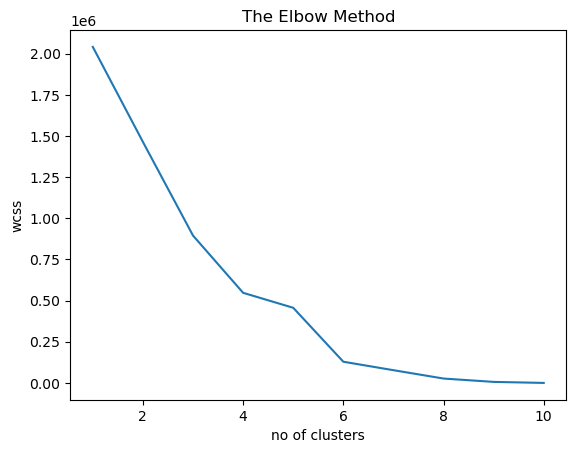

In [12]:
X = mid.iloc[:, 2:].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     
plt.plot(range(1,11), wcss,)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show() 

In [16]:


kmeansmodel = KMeans(n_clusters=4 , init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
#create a new column label in the dataframe
mid["label"]=labels
mid.loc[mid['label'] == 3, 'Category'] = 'God'
mid.loc[mid['label'] == 2, 'Category'] = 'Normal'
mid.loc[mid['label'] == 1, 'Category'] = 'Bagre'
mid.loc[mid['label'] == 0, 'Category'] = 'Academy'



/tmp/ipykernel_727425/2886560054.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_727425/2886560054.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
fig = px.scatter(mid,x="DPM",y="KP",color="Category",text="Player",title="K-mean clustering of Mid Laners")
fig.update_traces(textposition='top center')
fig.show()

In [21]:
players = ['Aegis', 'Aithusa', 'Ayu', 'Brance', 'CarioK', 'Cavalo', 'Celo', 'Ceos', 'Croc', 'Damage', 'Destroy', 
           'Disamis', 'Drakehero', 'dyNquedo', 'Envy', 'fNb', 'Fuuu', 'Grevthar', 'GUIGO', 'Hauz', 'Jojo', 'kabbie', 
           'Kiari', 'kojima', 'Kuri', 'Lonely', 'Makes', 'Malrang', 'micaO', 'Mir', 'Netuno', 'NinjaKiwi', 'Piloto',
            'ProDelta', 'RedBert', 'Robo', 'Route', 'scamber', 'Seize', 'SMILEY', 'Sting', 'SuperCleber', 'Tay', 
            'tinowns', 'TitaN', 'toucouille', 'Tutsz', 'Wizer', 'Yampi', 'zay']

grades = [77, 75, 80, 82, 80, ]
